In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**CLASSIFICATION ALGORITHMS**

In [7]:
customers_df = pd.read_csv('Income Data.csv')
customers_df.head(5)

,income,age
0,41100.0,48.75
1,54100.0,28.10
2,47800.0,46.75
3,19100.0,40.25
4,18200.0,35.80


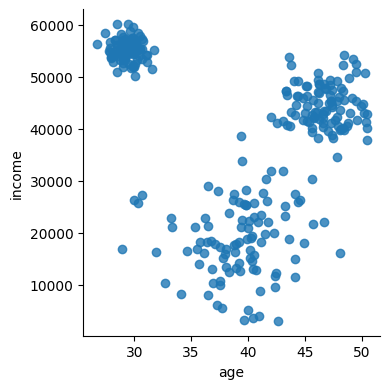

In [10]:
sn.lmplot(x="age", y="income", data=customers_df, fit_reg=False, height=4)

From the scatter plot it we observe that :
1. One on the top-left side of the graph, depicting low-age-high-income group.
2. One on the top-right side of the graph, depicting high-age-medium-income group.
3. One on the bottom of the graph, depicting a low-income group, which has an age spread low to high.

**K-MEANS CLUSTERING**

In [11]:
from sklearn.cluster import KMeans
clusters = KMeans(3)
clusters.fit(customers_df)

KMeans(n_clusters=3)

In [12]:
customers_df["clusterid"] = clusters.labels_

In [13]:
customers_df[0:5]

,income,age,clusterid
0,41100.0,48.75,2
1,54100.0,28.10,1
2,47800.0,46.75,2
3,19100.0,40.25,0
4,18200.0,35.80,0


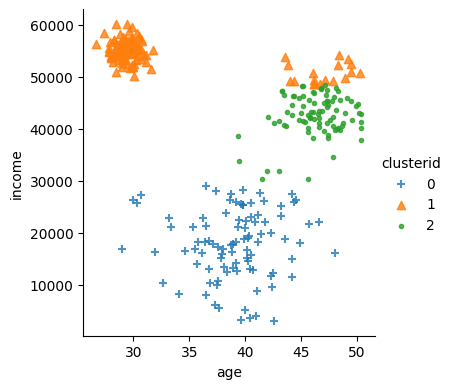

In [15]:
markers = ['+', '^', '.']
sn.lmplot(x="age", y="income", data=customers_df, hue="clusterid", fit_reg=False, markers=markers, height=4)

**Normalizing Features**

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_customers_df = scaler.fit_transform(customers_df[["age", "income"]])
scaled_customers_df[0:5]

array([[ 1.3701637 ,  0.09718548],
       [-1.3791283 ,  0.90602749],
       [ 1.10388844,  0.51405021],
       [ 0.23849387, -1.27162408],
       [-0.35396857, -1.32762083]])

We can create the clusters again using the normalized feature set.

In [17]:
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(scaled_customers_df)
customers_df["clusterid_new"] = clusters_new.labels_

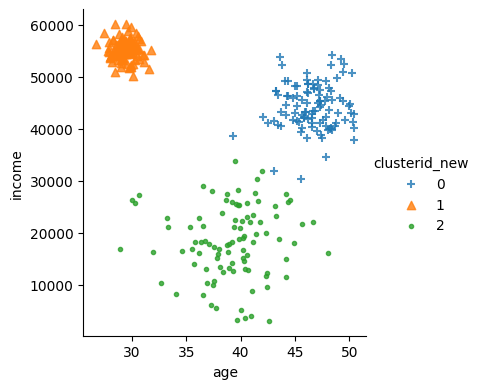

In [19]:
markers = ['+', '^', '.']
sn.lmplot(x="age", y="income", data=customers_df, hue="clusterid_new", fit_reg=False, markers=markers, height=4)

In [20]:
clusters.cluster_centers_

array([[1.78851064e+04, 3.90808511e+01],
       [5.45211864e+04, 3.20733051e+01],
       [4.25761364e+04, 4.63562500e+01]])

**Cluster Centers and Interpreting the Clusters**

In [22]:

customers_df.groupby('clusterid')[['age', 'income']].agg(['mean', 'std']).reset_index()

clusterid        age                  income             
                  mean       std          mean          std
0         0  39.080851  3.594112  17885.106383  6573.046256
1         1  32.073305  6.472703  54521.186441  2521.797341
2         2  46.356250  2.361531  42576.136364  3953.232180

From the data we can see that:

1. cluster(0): Customers with mean age of 39 and income of 17.9k. Mid age and low income.

2. cluster(1): Customers with mean age of 32 and income of 54.52k. Low age and high income.

3. cluster(2): Customers with mean age of 46 and income of 42.58k. High age and medium income.

**CREATING PRODUCT SEGMENTS USING CLUSTERING**

In [23]:
beer_df = pd.read_csv('beer.csv')
beer_df

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


In [24]:
scaler = StandardScaler()
scaled_beer_df = scaler.fit_transform(beer_df[['calories', 'sodium', 'alcohol', 'cost']])

**How many Clusters Exist?**

**1. Using Dendogram**

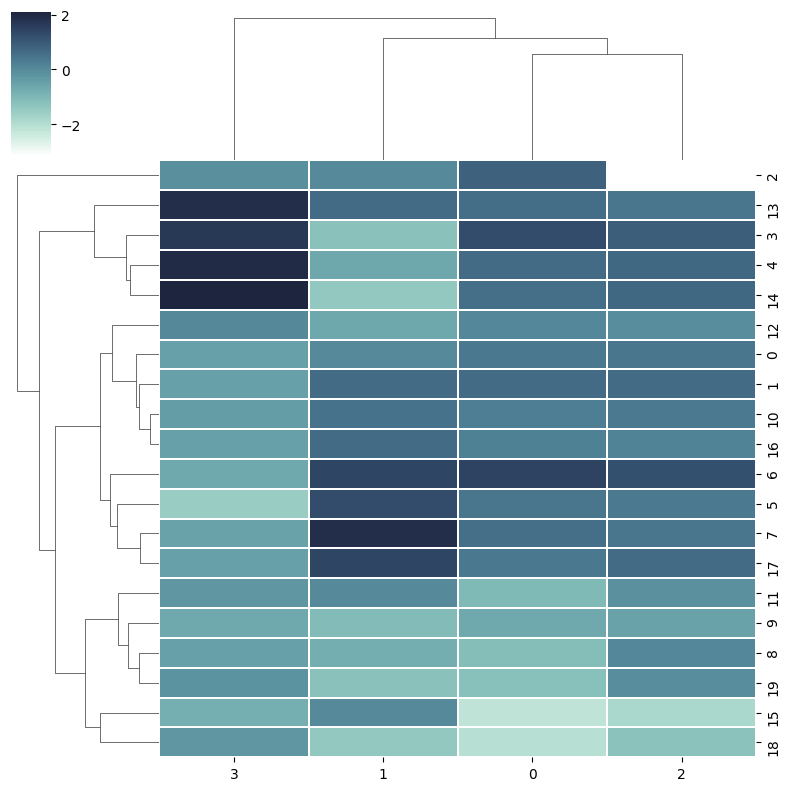

In [25]:
cmap = sn.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
sn.clustermap(scaled_beer_df, cmap=cmap, linewidths=.2, figsize=(8, 8))

In [28]:
beer_df.iloc[[10, 16]]

,name,calories,sodium,alcohol,cost
10,Coors,140,18,4.6,0.44
16,Hamms,139,19,4.4,0.43


As we can see brands Coors and Hamms are very similar across all the features.

In [30]:
beer_df.iloc[[2, 18]]

,name,calories,sodium,alcohol,cost
2,Lowenbrau,157,15,0.9,0.48
18,Olympia_Goled_Light,72,6,2.9,0.46


here the 2 brands are highly different.

**Finding Optimal number of clusters using Elbow Curve Method**

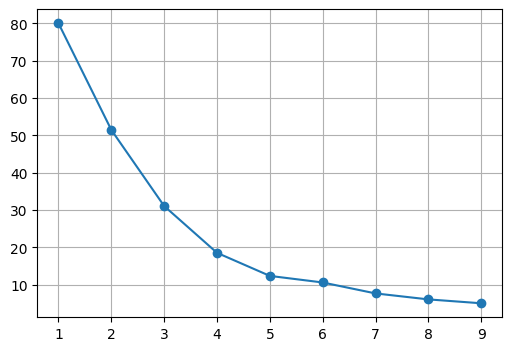

In [32]:
cluster_range = range(1, 10)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters)
    clusters.fit(scaled_beer_df)
    cluster_errors.append(clusters.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(cluster_range, cluster_errors, marker="o")
plt.grid()
plt.show()

In [33]:
# Normalizing the Features
scaler = StandardScaler()
scaled_beer_df = scaler.fit_transform(beer_df[['calories', 'sodium', 'alcohol', 'cost']])

# Creating Clusters
k = 3
clusters = KMeans(k, random_state=42)
clusters.fit(scaled_beer_df)
beer_df["clusterid"] = clusters.labels_

**Interpreting the Clusters**

In [34]:
# Cluster 0
beer_df[beer_df.clusterid == 0]

,name,calories,sodium,alcohol,cost,clusterid
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
5,Old_Milwaukee,145,23,4.6,0.28,0
6,Augsberger,175,24,5.5,0.40,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0
10,Coors,140,18,4.6,0.44,0
13,Becks,150,19,4.7,0.76,0
16,Hamms,139,19,4.4,0.43,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0


In [35]:
# Cluster 1
beer_df[beer_df.clusterid == 1]

,name,calories,sodium,alcohol,cost,clusterid
3,Kronenbourg,170,7,5.2,0.73,1
4,Heineken,152,11,5.0,0.77,1
8,Miller_Lite,99,10,4.3,0.43,1
9,Budweiser_Light,113,8,3.7,0.40,1
11,Coors_Light,102,15,4.1,0.46,1
12,Michelob_Light,135,11,4.2,0.50,1
14,Kirin,149,6,5.0,0.79,1
15,Pabst_Extra_Light,68,15,2.3,0.38,1
18,Olympia_Goled_Light,72,6,2.9,0.46,1
19,Schlitz_Light,97,7,4.2,0.47,1


In [36]:
# Cluster 2
beer_df[beer_df.clusterid == 2]

,name,calories,sodium,alcohol,cost,clusterid
2,Lowenbrau,157,15,0.9,0.48,2


**Hirerarchical Clustering**

In [38]:
from sklearn.cluster import AgglomerativeClustering

h_clusters = AgglomerativeClustering(3)
h_clusters.fit(scaled_beer_df)
beer_df["h_clusterid"] = h_clusters.labels_

In [39]:
beer_df[beer_df.h_clusterid == 0]

,name,calories,sodium,alcohol,cost,clusterid,h_clusterid
2,Lowenbrau,157,15,0.9,0.48,2,0
8,Miller_Lite,99,10,4.3,0.43,1,0
9,Budweiser_Light,113,8,3.7,0.40,1,0
11,Coors_Light,102,15,4.1,0.46,1,0
12,Michelob_Light,135,11,4.2,0.50,1,0
15,Pabst_Extra_Light,68,15,2.3,0.38,1,0
18,Olympia_Goled_Light,72,6,2.9,0.46,1,0
19,Schlitz_Light,97,7,4.2,0.47,1,0


In [40]:
beer_df[beer_df.h_clusterid == 1]

,name,calories,sodium,alcohol,cost,clusterid,h_clusterid
0,Budweiser,144,15,4.7,0.43,0,1
1,Schlitz,151,19,4.9,0.43,0,1
5,Old_Milwaukee,145,23,4.6,0.28,0,1
6,Augsberger,175,24,5.5,0.40,0,1
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0,1
10,Coors,140,18,4.6,0.44,0,1
16,Hamms,139,19,4.4,0.43,0,1
17,Heilemans_Old_Style,144,24,4.9,0.43,0,1


In [41]:
beer_df[beer_df.h_clusterid == 2]

,name,calories,sodium,alcohol,cost,clusterid,h_clusterid
3,Kronenbourg,170,7,5.2,0.73,1,2
4,Heineken,152,11,5.0,0.77,1,2
13,Becks,150,19,4.7,0.76,0,2
14,Kirin,149,6,5.0,0.79,1,2
